# Interpolation and Approximation.

## The Interpolation Problem.

Polynomials are used as the basic means of approximation by nearly all areas of numerical analysis. In the following sections, we shall go deeper into the non-equidistant interpolation problem:

Let $a = x_1 < x_2 < \ldots < x_n = b$ be a grid of distinct points $x_i$. Let $\mathcal{P}_n$ be the vector space of all polynomials in one variable of degree less than $n$. The interpolation problem to find a polynomial $p \in \mathcal{P}_n$, such that 

$$
p(x_i) = f(x_i)
$$

for $i=1:n$.

**Theorem**. *Weierstrass Approximation Theorem*. 

If $f(x)$ is a continuous function on the interval $[a,b]$, then we can construct a sequence of polynomials $(P_n)$ that approximates $f$ in the following way:
Given any $\epsilon > 0$, there exists an $N \in \mathbf{N}$, such that for all $x \in [a,b]$, we have

$$\lvert P_n(x) - f(x) \vert < \epsilon$$

for all $n \ge N$.

*Proof.*

Let $f\in C[a,b]$. Assume $0 < a < b < 1$. We extend out the domain of $f(x)$ to the whole real line by defining

$$
f(x) := 
\begin{cases}
0, & x \le 0\\
\frac{x}{a}f(a), & 0 < x < a\\
f(x), & a \le x \le b\\
\frac{1 - x}{1 - b}f(b), & b < x < 1\\
0, & x \ge 1
\end{cases}
$$

We see that $f$ is continuous on the whole real line. 

Consider the sequence of positive constants $J_n$ with

$$
J_n := \int_{-1}^{1} (1 - u^2)^n du
$$

and we define our sequence of polynomials by,

$$
P_n(x) := \frac{1}{J_n} \int_{0}^{1} f(t) [1 - (t - x)^2]^n dt
$$

It is easy to see that $P_n$ is a polynomial of degree (at most) $2n$ in $x$ with constant coefficients. 

Now as our function $f$ vanishes outside the interval $[0,1]$ we have for all $x \in [0,1]$

$$
\begin{align*}
P_n(x) &= \frac{1}{J_n} \int_{0}^{1} f(t) [1 - (t - x)^2]^n dt \\
&=\frac{1}{J_n} \int_{-1+x}^{0} f(t) [1 - (t - x)^2]^n dt + \frac{1}{J_n} \int_{0}^{1} f(t) [1 - (t - x)^2]^n dt + \frac{1}{J_n} \int_{1}^{1+x} f(t) [1 - (t - x)^2]^n dt  \\
&= \frac{1}{J_n} \int_{-1+x}^{1+x} f(t) [1 - (t - x)^2]^n dt \\
&= \frac{1}{J_n} \int_{-1}^{1} f(x+u) [1 - (u)^2]^n du \\
\end{align*}
$$

where we have used the substitution $u = t - x$ in the last step. When $t = -1 + x$, $u = -1$ and when $t = 1 + x$, $u = 1$.

We consider,

$$
\begin{align*}
P_n(x) - f(x) &= \frac{1}{J_n} \int_{-1}^{1} f(x+u) [1 - (u)^2]^n du - f(x)\\
&= \frac{1}{J_n} \int_{-1}^{1} f(x+u) [1 - (u)^2]^n du - \frac{1}{J_n}\cdot J_n f(x)\\
&= \frac{1}{J_n} \int_{-1}^{1} f(x+u) [1 - (u)^2]^n du - \frac{1}{J_n}\int_{-1}^{1}f(x)[1 - (u)^2]^n du\\
&= \frac{1}{J_n} \int_{-1}^{1} (f(x+u) - f(x)) [1 - (u)^2]^n du
\end{align*}
$$

Let $\epsilon > 0$. Since the function $f$ is uniformly continuous, for every $\epsilon > 0$, there exists a $\delta > 0$, such that whenever $\lvert u \rvert < \delta$, we have:

$$
\lvert f(x + u) - f(x) \rvert < \frac{\epsilon}{2}
$$

Since $f$ is continuous over the entire real line, if $M > 0$ is the maximum value of the function $f$, we have:

$$
\begin{align*}
\lvert f(x + u) - f(x) \rvert &\le \lvert f(x + u) \rvert + \lvert f(x) \rvert\\
&\le M + M = 2M
\end{align*}
$$

for all $u$.

For $\lvert u \rvert > \delta$, we have:

$$
1 \le \frac{u^2}{\delta^2}
$$

and so from the above inequalities, we have,
$$
\lvert f(x + u) - f(x) \rvert \le \frac{\epsilon}{2} + \frac{2M u^2}{\delta^2}
$$

So, the distance between $P_n(x)$ and $f(x)$ can be bound by,

$$
\begin{align*}
\lvert P_n(x) - f(x) \rvert &= \frac{1}{J_n} \int_{-1}^{1} \lvert f(x+u) - f(x) \rvert [1 - (u)^2]^n du \\
&\le \frac{1}{J_n} \int_{-1}^{1} \frac{\epsilon}{2} \cdot  [1 - (u)^2]^n du + \frac{1}{J_n} \int_{-1}^{1} \frac{2M u^2}{\delta^2}  [1 - (u)^2]^n du\\
&= \frac{\epsilon}{2} + \frac{1}{J_n}\frac{2M}{\delta^2}I_n
\end{align*}
$$

where $(I_n)$ is the sequence of integrals $\int_{-1}^{1}u^2[1-u^2]^n du$. What we are going to do is, we shall show that the limit $I_n/J_n$ approaches $0$ as $n \to \infty$.

Using integration by parts, we have:

$$
\begin{align*}
I_n &= \int_{-1}^{1}u \cdot u[1-u^2]^n du\\
&= \int_{-1}^{1} \frac{[1-u^2]^{n+1}}{2(n+1)}\\
&= \frac{J_{n+1}}{2(n+1)}\\
&< \frac{J_n}{2n}
\end{align*}
$$

since it can be shown that $J_{n+1} \le J_n$. Consequently, $\lvert I_n/J_n \rvert < \frac{1}{2n}$, so by the comparison test, $I_n/J_n$ is convergent and approaches zero. Given any $\epsilon > 0$, we can make the distance $\lvert I_n/J_n \rvert < \frac{\delta^2}{4M}\epsilon $.

$$
\begin{align*}
\lvert P_n(x) - f(x) \rvert 
&\le \frac{\epsilon}{2} + \frac{1}{J_n}\frac{2M}{\delta^2}I_n \\
&< \frac{\epsilon}{2} + \frac{\epsilon}{2} = \epsilon \\
\end{align*}
$$

### Bases for Polynomial Interpolation.

A set of polynomials $\mathbf{p} = \{p_1(x),p_2(x),\ldots,p_n(x)\}$, such that any polynomial $p \in \mathcal{P}_n$ can be expressed as a linear combination 

$$
p(x) = \sum_{j=1}^{n} c_j p_j(x)
$$

is called a basis of $\mathcal{P}_n$. The column vector $c=(c_1,c_2,c_3,\ldots,c_n)^T$ can be viewed as the coordinates of the polynomial $p$ in the vector space $\mathcal{P}_n$, with respect to this basis. Thus, the interpolation problem leads to a system of linear equations:

$$
\begin{align*}
c_1p_1(x_1) + c_2p_2(x_1) + \ldots + c_mp_m(x_1) &= f(x_1)\\
c_1p_1(x_2) + c_2p_2(x_2) + \ldots + c_mp_m(x_2) &= f(x_2)\\
\vdots\\
c_1p_1(x_n) + c_2p_2(x_n) + \ldots + c_mp_m(x_n) &= f(x_n)\\
\end{align*}
$$

In matrix notation,

$$
\begin{bmatrix}
p_1(x_1) & p_2(x_1) & \ldots & p_m(x_1)\\
p_1(x_2) & p_2(x_2) & \ldots & p_m(x_2)\\
\vdots   & \vdots   &        & \vdots \\
p_1(x_n) & p_2(x_n) & \ldots & p_m(x_n)
\end{bmatrix}
\begin{bmatrix}
c_1\\
c_2\\
\vdots\\
c_m
\end{bmatrix}
=
\begin{bmatrix}
f(x_1)\\
f(x_2)\\
\vdots\\
f(x_n)
\end{bmatrix}
$$

or 

$$
M_n(\mathbf{p})c = f
$$

Since, the interpolation polynomial for any function $f$ is unique, mathematically the choice of basis (for a finite-dimensional space) makes no difference. Computationally, working with *rounded values of the coefficients*, the choice of basis can make a great difference. If the purpose is to compute derivatives or integrals of the interpolation polynomial, the power basis or the **shifted power basis**, where $p_j(x) = (x - c)^{j-1}$ that is

$$
p(x) = \sum_{j=1}^{n}c_j (x - d)^{j-1}
$$

is convenient. If a shifted power basis is to be used for polynomial approximation on an interval $[a,b]$, it is often best to choose $d = (a + b)/2$.

For the power basis, $p_j(x) = x^{j-1}$, the coefficients of the interpolation polynomial is given by the solution of the linear system $V_n^T c = f$, where $V_n$ is the Vandermonde Matrix.

$$
V_n = 
\begin{bmatrix}
1 & 1 & 1 & \ldots & 1\\
x_1 & x_2 & x_3 & \ldots & x_n\\
x_1^2 & x_2^2 & x_3^2 & \ldots & x_n^2\\
x_1^3 & x_2^3 & x_3^3 & \ldots & x_n^3\\
\vdots\\
x_1^{n-1} & x_2^{n-1} & x_3^{n-1} & \ldots & x_n^{n-1}\\
\end{bmatrix}
$$

This matrix is non-singular since the Vandermonde determinant can be simplified as,

$$
\begin{align*}
\det{V_n} &=  
\begin{array}{|ccccc|}
1 & 1 & 1 & \ldots & 1\\
x_1 & x_2 & x_3 & \ldots & x_n\\
x_1^2 & x_2^2 & x_3^2 & \ldots & x_n^2\\
x_1^3 & x_2^3 & x_3^3 & \ldots & x_n^3\\
\vdots\\
x_1^{n-1} & x_2^{n-1} & x_3^{n-1} & \ldots & x_n^{n-1}\\
\end{array}\\
&= 
\begin{array}{|ccccc|}
1 & 0 & 0 & \ldots & 0\\
x_1 & x_2 - x_1 & x_3 - x_1 & \ldots & x_n - x_1\\
x_1^2 & x_2^2 - x_1^2 & x_3^2 - x_1^2 & \ldots & x_n^2 - x_1^2\\
x_1^3 & x_2^3 - x_1^3 & x_3^3 - x_1^2& \ldots & x_n^3 - x_1^3\\
\vdots\\
x_1^{n-1} & x_2^{n-1} -x_1^{n-1}   & x_3^{n-1}-x_1^{n-1}  & \ldots & x_n^{n-1} -x_1^{n-1} 
\end{array}\\
&=\begin{array}{|cccc|}
x_2 - x_1 & x_3 - x_1 & \ldots & x_n - x_1\\
x_2^2 - x_1^2 & x_3^2 - x_1^2 & \ldots & x_n^2 - x_1^2\\
x_2^3 - x_1^3 & x_3^3 - x_1^2& \ldots & x_n^3 - x_1^3\\
\vdots\\
x_2^{n-1} -x_1^{n-1}   & x_3^{n-1}-x_1^{n-1}  & \ldots & x_n^{n-1} -x_1^{n-1} 
\end{array}\\
&= (x_2 - x_1)(x_3 - x_1)\ldots(x_n-x_1)\begin{array}{|cccc|}
1 & 1 & \ldots & 1\\
x_2 + x_1 & x_3 + x_1 & \ldots & x_n + x_1\\
x_2^2 + x_2x_1 + x_1^2 & x_3^2 + x_3x_1 + x_1^2& \ldots & x_n^2 +x_nx_1 + x_1^2\\
\vdots
\end{array}\\
&= (x_2 - x_1)(x_3 - x_1)\ldots(x_n-x_1)\begin{array}{|cccc|}
1 & 0 & \ldots & 0\\
x_2 + x_1 & x_3 - x_2 & \ldots & x_n - x_2\\
x_2^2 + x_2x_1 + x_1^2 & x_3^2 - x_2^2 + x_1(x_3 - x_2) & \ldots & x_n^2 - x_2^2 + x_1(x_n - x_2)\\
\vdots
\end{array}\\
&= (x_2 - x_1)\ldots(x_n-x_1)(x_3-x_2)\ldots(x_n-x_2)\begin{array}{|ccc|}
1 & \ldots & 1\\
x_3 + x_2 + x_1 & \ldots & x_n+x_2+x_1\\
\vdots
\end{array}\\
&= \prod_{1\le i < j \le n}(x_j - x_i)
\end{align*}
$$

This determininant will be identically equal to zero (for all $x$), if and only if $x_i = x_j$. So, the columns of the Vandermonde matrix are linearly independent. So, the system of equations $V_n^T \mathbf{c} = f$ has a unique solution vector $\mathbf{c}$. Consequently, the interpolating polynomial is unique.

Let $\mathbf{p} = \{p_1(x),p_2(x),\ldots,p_n(x)\}$ and $\mathbf{q} = \{q_1(x),q_2(x),\ldots,q_n(x)\}$ be two bases for $\mathcal{P}_n$. Then, the $q_j$ must be some linear combinatios of the $p_k$, $k=1:n$. This can be expressed as a matrix-vector product.

$$
\begin{align*}
\mathbf{q}^T = \mathbf{p}^T S
\end{align*}
$$

where $S$ is a constant matrix. $S$ must be non-singular(invertible), for, if $S$ were singular, then the homogenous system of equations $S\mathbf{v}=\mathbf{0}$ would have a non-trivial solution vector $\mathbf{v}$ and hence, 

$$
 \mathbf{q}^T \mathbf{v}= \mathbf{p}^T S \mathbf{v} = \mathbf{0}
$$

But, that would imply $v_1q_1(x) + \ldots + v_nq_n(x) = \mathbf{0}$, where not all of $v_1,v_2,\ldots,v_n$ are equal to zero. So, $(q_1(x),q_2(x),\ldots,q_n(x))^T$ is not a basis for $\mathcal{P}_n$.

Let $T$ be the linear transformation that maps the column vector of $c=(c_1,c_2,\ldots,c_n)^T$ (the coefficients of the interpolation polynomial $p$) to the functional values $f(x_i)$. Let $\mathbf{p}$ and $\mathbf{q}$ be two basis of $\mathcal{P}_n$. Let $M_n(\mathbf{p})$ and $M_n(\mathbf{q})$ be the matrix of the linear transformation $T$, with respect to the basis $\mathbf{p}$ and $\mathbf{q}$.

By putting $x = x_i$, $i=1:m$ in the equation $\mathbf{q}^T = \mathbf{p}^T S$, we have from basic linear algebra,

$$
\begin{align*}
\sum e_i (q_1(x_i),\ldots,q_n(x_i)) &= \sum e_i (p_1(x_i),\ldots,p_n(x_i)) \cdot S\\
M_n(\mathbf{q}) &= M_n(\mathbf{p})S
\end{align*}
$$

If we set $p(x) = \sum d_j q_j(x)$, the linear algebraic system discussed earlier becomes, $M_n(\mathbf{q})d = f$ and then,

$$
\begin{align*}
M_n(\mathbf{p})c &= f = M_n(\mathbf{q})d\\
&= M_n(\mathbf{p})Sd\\
c &= Sd = M_n^{-1}(\mathbf{p})f
\end{align*}
$$

The (change-of-basis) matrix $S$ for the transformation between representations is thus like coordinate transformation in Geometry. 

The power basis has a bad reputation which is related to the ill-conditioning of the corresponding Vandermonde matrix. There are other basis in $\mathcal{P}_n$ which are often more advantageous to use. By a *triangle family* of polynomials, we mean a sequence of polynomials 

$$
\begin{align*}
q_1(x)&= s_{11}\\
q_2(x)&= s_{12} + s_{22}x\\
q_3(x)&= s_{13} + s_{23}x + s_{33}x^2\\
\vdots\\
q_n(x)&= s_{1n} + s_{2n}x + s_{3n}x^2 + \ldots + s_{nn}x^{n-1}
\end{align*}
$$

where $s_{jj}\ne 0$ for all $j$. Note that the coefficients form a lower triangular matrix $S$. 

Conversely, for any $j$, $p_j(x) = x^{j-1}$ can be expressed recursively and uniquely as linear combinations of $q_1(x),q_2(x),\ldots,q_j(x)$. We obtain a triangle scheme also for the inverse transformation, since we can easily perform forward-substitution and solve for the values of $1,x,x^2,\ldots,x^n$.

$$
\begin{align*}
1 &= \frac{q_1(x)}{s_{11}}\\
x &= \frac{q_2(x) - s_{12}(1)}{s_{22}} = \frac{q_2(x) - s_{12}\cdot\frac{q_1(x)}{s_{11}}}{s_{22}} = \frac{s_{11}q_2 - s_{12}q_1}{s_{11}s_{22}}\\
x^2 &= \frac{q_3(x) - s_{13} - s_{23}x}{s_{33}} = \ldots\\
\vdots
\end{align*}
$$

The coefficients form a lower triangular matrix $T = S^{-1}$. Since every triangle family is invertible, it's columns are linearly independent. So, *every triangle family* is a basis for $\mathcal{P}_m$.

Among interesting triangle families are the shifted power basis $(x-c)^j$, the Chebyshev polynomials $T_j(x)$, and many other families of orthogonal polynomials.

A triangle family which is often very convenient for solving the interpolation problem is the family of **Newton polynomials**

$$
\begin{align*}
p_1(x) &= 1\\
p_2(x) &= (x - x_1)\\
p_3(x) &= (x - x_1)(x - x_2)\\
\vdots\\
p_j(x) &= (x - x_1)(x - x_2)\cdots(x - x_{j-1})
\end{align*}
$$

which has unit leading coefficients. Since $p_j(x_k) = 0$, if $k < j$, we obtain using the representation 

$$
p(x) = c_1 p_1(x) + c_2 p_2(x) + c_3 p_3(x)+ \ldots + c_n p_n(x)
$$

the lower triangular system $Lc = f$ for the coefficients, where 

$$
\begin{array}{lllll}
p_1(x_1) = 1, & p_2(x_1) = 0, & p_3(x_1) = 0, & \ldots, & p_n(x_1) = 0\\
p_1(x_2) = 1, & p_2(x_2) = (x_2 - x_1), & p_3(x_2) = 0, & \ldots, & p_n(x_2) = 0\\
p_1(x_3) = 1, & p_2(x_3) = (x_3 - x_1), & p_3(x_3) = (x_3 - x_1)(x_3 - x_2), & \ldots, & p_n(x_3) = 0\\
\vdots\\
p_1(x_n) = 1, & p_2(x_n) = (x_n - x_1), & p_3(x_n) = (x_n - x_1)(x_n - x_2), & \ldots, & p_n(x_3) = \prod_{j=1}^{n-1} (x_n - x_j)\\
\end{array}
$$

so

$$
L = 
\begin{bmatrix}
1 & & & & & \\
1 & (x_2 - x_1) &  & & &\\
1 & (x_3 - x_1) & (x_3 - x_1)(x_3 - x_2) & & &\\
1 & (x_4 - x_1) & (x_4 - x_1)(x_4 - x_2) & (x_4 - x_1)(x_4 - x_2)(x_4 - x_3)& &\\
\vdots & \vdots & \vdots                 &  \vdots                          & \ddots & \\
1 & (x_n - x_1) & (x_n - x_1)(x_n - x_2) & (x_n - x_1)(x_n - x_2)(x_n - x_3)& \ldots & \prod_{j=1}^{n-1} (x_n - x_j)
\end{bmatrix}
$$

Hence, the coefficients in the equation $Lc = f$ can be computed by forward substitution. In the next section, we shall see how this basis leads to Newton's interpolation formula. This is one of the best interpolation formulas, with respect to flexibility, computational economy and numerical stability. 

If a polynomial $p(x)$ is given in the form above, then it can be evaluated as

$$
\begin{align*}
p(x) &= c_1p_1(x) + c_2p_2(x) + c_3p_3(x) + c_4p_4(x) + \ldots + c_n p_n(x)\\
&= c_1 + c_2(x - x_1) + c_3(x - x_1)(x - x_2) + c_4(x - x_1)(x - x_2)(x - x_3) + c_5(x - x_1)(x - x_2)(x - x_3)(x - x_4) + \ldots + c_n \prod_{j=1}^{n-1} (x - x_j)\\
&= c_1 + (x - x_1)\left[c_2 + c_3(x - x_2) + c_4(x - x_2)(x - x_3)+ c_5(x - x_2)(x - x_3)(x - x_4) + \ldots + c_n\prod_{j=2}^{n-1} (x - x_j)\right]\\
&= c_1 + (x - x_1)\left[c_2 + (x - x_2)\left\{c_3+ c_4(x - x_3) + c_5 (x - x_3)(x - x_4)+\ldots + c_n\prod_{j=3}^{n-1} (x - x_j)\right\}\right]\\
&= c_1 + (x - x_1)\left[c_2 + (x - x_2)\left\{c_3 + (x - x_3)\left(c_4 + c_5 (x - x_4)+\ldots + c_n\prod_{j=4}^{n-1} (x - x_j)\right)\right\}\right]\\
& \vdots \\
&= \ldots + c_{n-3} + (x - x_{n-3})[c_{n-2}+(x - x_{n-2})\{c_{n-1} + c_n(x - x_{n-1})\}]
\end{align*}
$$

This can be evaluated by a recursion formula similar to Horner's rule.

Other bases of $\mathcal{P}_n$ are sometimes more advantageous. Let $x_i$, $i=1:n$ be distinct interpolation points. The Lagrange $\mathcal{l}_j(x)$ used in are polynomials of degree $n-1$

$
\begin{array}{cc}
\mathcal{l}_j(x)=\prod_{i = 1\\ i \ne j}^{n} \frac{x - x_i}{x_j - x_i}, & j = 1:n
\end{array}
$

where $x_i, i = 1:n$, are $n$ distinct real numbers, which satisfy

$$
\mathcal{l}_j(x_i) = \delta_{ij} = 
\begin{cases}
0, & i \ne j\\
1, & i = j
\end{cases}
$$

Let $n=3$. Then, the Lagrange polynomials are:

$$
l_1(x) = \frac{(x - x_2)(x - x_3)}{(x_1 - x_2)(x_1 - x_3)}\\
l_2(x) = \frac{(x - x_1)(x - x_3)}{(x_2 - x_1)(x_2 - x_3)}\\
l_3(x) = \frac{(x - x_1)(x - x_2)}{(x_3 - x_1)(x_3 - x_2)}
$$

We find that,

$$
\begin{array}{ccc}
l_1(x_1) = 1 & l_2(x_1) = 0 & l_3(x_1) = 0\\
l_1(x_2) = 0 & l_2(x_2) = 1 & l_3(x_2) = 0\\
l_1(x_3) = 0 & l_2(x_3) = 0 & l_3(x_3) = 1
\end{array}
$$

So, the lagrange polynomials are like the standard basis vectors in $\mathbf{R}^n$ and form a basis of $\mathcal{P}_n$. And by substituting $x = x_j$, we find that the coefficients of interpolation are $c_j = f(x_j)$.

From this follows the *Lagrange Interpolation Formula*.

**Theorem.** The unique interpolation polynomial $p \in \mathcal{P}_n$ interpolating the function $f$ at the distinct points $x_i$, $i=1:n$ can be written 

$$
\begin{align*}
p(x) &= \sum_{j=1}^{n} c_j l_j(x) \\
&= \sum_{j=1}^{n}f(x_j)\prod_{i \ne j \\ i = 1}^{n} \frac{(x - x_i)}{x_j - x_i}
\end{align*}
$$

Lagrange's interpolation formula has been widely regarded as being mainly of theoretical interest. The two modified forms of Lagrange's interpolation formula will be stated in the next section, which are very attractive computationally.

A natural extension of the interpolation problem is to determine a polynomial 

$$
p(x) = \sum_{j=1}^{n} c_j p_j(x) \in \mathcal{P}_n
$$

that, in some sense, best fits to the data $(x_i,f(x_i))$, $i=1:m$ where $m > n$. Since the number of equations is larger than the number of parameters, the corresponding linear system $Mc = f$ is *overdetermined*, and can typically be satisfied only approximately. Overdetermination can be used to attain two different types of smoothing:

(a) to reduce the effect of random or other irregular errors in the values of the function

(b) to give the polynomial a smoother behavior between the grid points. 

In **discrete least squares approximation**, one determines the coefficient vector $c$ that minimizes the sum of the squared residuals 

$$
S(\mathbf{c}) = \sum_{i=1}^{m}(p(x_i)-f(x_i)^2)
$$

The conditions for minimization are $\nabla S = 0$. It leads to rather simple computations. 

We know that, $p(x_i) = c_1 p_1(x_i) + c_2 p_2 (x_i) + \ldots + c_m p_m(x_i)$.

So, 

$$
S(\mathbf{c}) = \sum_{i=1}^{m}\left(\sum_{k}c_k p_k(x_i)-f(x_i)\right)^2
$$

Differentiating with respect to the coefficient $c_k$, we have:

$$
\begin{align*}
\frac{\partial S(\mathbf{c})}{\partial c_k} = 2\sum_{i=1}^{m}p_k(x_i)\left(\sum_{k}c_k p_k(x_i)-f(x_i)\right)
\end{align*}
$$

**Question.** Write a program $c = polyapp(x,y,n)$ that finds the coefficient vector $c$ for a polynomial in $p \in \mathcal{P}_n$, in a shifted power basis, such that $y_i \approx p(x_i)$ for $i=1:m,m \ge n$, in the least squares sense, or study a program that does almost this.

Solution. The shifted power basis for $\mathcal{P}_n$ is given by,

$$
\begin{align*}
p_1(x) &= 1\\
p_2(x) &= (x - d)\\
p_3(x) &= (x - d)^2\\
\vdots\\
p_n(x) &= (x - d)^n
\end{align*}
$$

We have $m > n$ data points. The interpolation problem is, $p(x_i) = f(x_i)$ for $i=1:m$. In matrix form, $M_n(\mathbf{p}) \mathbf{c} = f$.

$$
\begin{bmatrix}
p_1(x_1) & p_2(x_1) & \ldots & p_n(x_1) \\
p_1(x_2) & p_2(x_2) & \ldots & p_n(x_2) \\
p_1(x_3) & p_2(x_3) & \ldots & p_n(x_3) \\
\vdots\\
p_1(x_m) & p_2(x_1) & \ldots & p_n(x_m)
\end{bmatrix} \begin{bmatrix}
c_1 \\
c_2 \\
c_3 \\
\vdots\\
c_n
\end{bmatrix} = \begin{bmatrix}
f(x_1)\\
f(x_2)\\
f(x_3)\\
\vdots\\
f(x_m)
\end{bmatrix}
$$

We are interested to find the coefficient vector $\mathbf{c}$ such that the sum of the squared residuals 

$$
S(\mathbf{c}) = \sum_i \left[\sum_{k=1}^{n}c_k p_k(x_i) - f(x_i) \right]^2
$$

is minimized. The partial derivative with respect to $c_k$ is,

$$
\begin{align*}
\frac{\partial S(\mathbf{c})}{\partial c_k} &= 2\sum_{i=1}^{m}p_k(x_i)\left(\sum_{j=1}^{n}c_j p_j(x_i)-f(x_i)\right)\\
&= 2\sum_{i=1}^{m}p_k(x_i) \left(\sum_{j=1}^{n} c_j p_j(x_i)\right) -2 n\sum_{i=1}^{m}p_k(x_i)f(x_i)
\end{align*}
$$

The function $S$ is minimized at the critical point where $\mathbf{c}_0$ where the gradient vector, and therefore all partial derivatives are zero.

```python
import numpy.linalg as linalg

def polyapp(x,y,n):
    m = len(x) # No of data points
    a = min(x) # Determine the interval [a,b]
    b = max(x)
    d = (a + b)/2 
    
    # We assume a shifted power basis for a polynomial p in P_n.
    def p(x,k):
        return (x - d)**k
    
    # We find the coefficient vector c for a polynomial p in P_n, such that 
    # y_i = p(x_i) in a least squares sense. The coefficient vector is given by the solution of a square linear
    # algebraic system.
    
    A = np.zeros((n,n))
    
    # The term multiplying c_j in the k'th equation is sum_{i=1}^m p_k(x_i) p_j(x_i)
    
    for k in range(0,n):
        for j in range(0,n):
            for i in range(0,m):
                A[k,j] = A[k,j] + p(x[i],k) * p(x[i],j)
                
    
    # Construct the right hand side vector 
    b = np.zeros(m)
    
    for k in range(0,n):
        for i in range(0,m):
            b[k] = b[k] + y[i]*p(x[i],k)
            
    c = linalg.solve(A,b)
    return A,c

def polyval(x,c,d,n):
    y = 0
    for j in range(0,n):
        y = y + c[j]*((x - d)**j)
    return y
```

(b) The following data show the development of the Swedish Gross Domestic Product (GDP), quoted from a table made by a group associated with the Swedish Employer's confederation. (The data are expressed in prices of 1985 and scaled so that the value for 1950 is 100.

```
x = np.array([1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990])
y = np.array([100.0, 117.7,139.3,179.3,219.3,249.1,267.5,291.5,326.4])
```

For the upper pairs of the data, compute and plot $p(x)$, $x \in [1950,2000]$. Mark the given data points. Do this for $m=9$ and for say $n=9$ and then for $n=8:-2:2$. Store the results so that comparisons can be made afterwards.

In [60]:
from algorithms.interpolation import polyapp
import numpy as np

x = np.array([1950.0, 1955.0, 1960.0, 1965.0, 1970.0, 1975.0, 1980.0, 1985.0, 1990.0])
y = np.array([100.0, 117.7,139.3,179.3,219.3,249.1,267.5,291.5,326.4])

A,c = polyapp(x,y,9)
c

array([ 2.19300000e+02,  7.20247619e+00, -2.13697619e-01, -9.22000000e-03,
        3.19611111e-04,  1.28000000e-05,  2.88444444e-06,  1.52380952e-09,
       -6.10793651e-09])

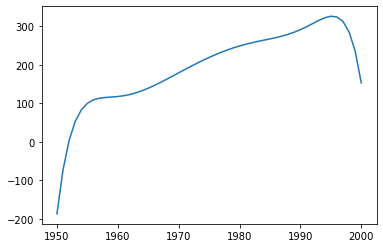

In [55]:
# Plot the interpolation polynomial 
x_num = 51
x_data = np.linspace(1950.0,2000.0,x_num)
a = 1950.0
b = 2000.0
n = 9

y_hat = np.zeros(x_num)

for i in range(0,x_num):
    y_hat[i] = polyval(x_data[i],c,(a+b)/2,9)
    
plt.plot(x_cont,y_hat)
plt.show()

## Interpolation Formulas and Algorithms.

### Newton's form of the interpolation polynomial.

Newton's interpolation formula uses the triangle family of Newton Polynomials. 

$$
p_k(x) = 
$$

Before we attempt to write an algorithm that carries out the recursive process in this proof, we first need to make some observations. First, the polynomials 